# Titanic Survival Data Exploration and Prediction

This project is from a Kaggle Competition. 
Link: https://www.kaggle.com/c/titanic/data

## Workflow stages

The competition solution workflow goes through seven stages described in the Data Science Solutions book.

    1. Problem definition.
    2. Acquire data.
    3. Wrangle, prepare, cleanse the data.
    4. Analyze, identify patterns, and explore the data.
    5. Model, predict and solve the problem.
    6. Visualize, report, and present the problem solving steps and final solution.
    7. Supply the results.

## Problem Description:
The sinking of the RMS Titanic is one of the most infamous shipwrecks in history.  On April 15, 1912, during her maiden voyage, the Titanic sank after colliding with an iceberg, killing 1502 out of 2224 passengers and crew. This sensational tragedy shocked the international community and led to better safety regulations for ships.

One of the reasons that the shipwreck led to such loss of life was that there were not enough lifeboats for the passengers and crew. Although there was some element of luck involved in surviving the sinking, some groups of people were more likely to survive than others, such as women, children, and the upper-class.

Complete the analysis of what sorts of people were likely to survive. In particular, we ask you to apply the tools of machine learning to predict which passengers survived the tragedy.

In [1]:
#import libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline
sns.set_style('whitegrid')

## Aquire Data

In [60]:
train_data = pd.read_csv('titanic_train.csv')

## Analyzing Data:
#### Variable Types:
    - Categorical: Survived, Sex, Embarked
    - Ordinal: Pclass
    - Continuous: Age, Fare
    - Discrete: SibSp, Parch
    - Alpha Numeric: Ticket, Cabin

#### Observations: 
    - Name may not be a good feature in solving the problem because of variations in spelling and ways of describing a name.
    - Title can be extracted from Name as a feature.
    - Sex varaible needs to be transformed into Gender (male=1,female=0).
    - Age, Ticket and Cabin may require data correction.
    - Initial Alphabet in Cabin can be used as Nominal Value.
    - PassengerId contains no useful information regarding survival and may be dropped.
    

In [61]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [62]:
train_data.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


#### Data Types:
        - object:             Name, Sex, Ticket, Cabin, Embarked
        - numerical:          PassengerId, Survived, Pclass, Age, SibSp, Parch, Fare

In [5]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


#### Missing Data:
    - Cabin (687)
    - Age (177)
    - Embarked (2)
    
#### Observation:
    - Drop Cabin feature since most of the data is missing. 
    - Age and Embarked require correction.

In [6]:
train_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

#### Analyzing the distributions of Numerical Features


#### Observations: 
    - Survival rate of sample data set is 38%
    - Only 30% of the people had sibling or spouse onboard.
    - More than 75% people had no parent or children onboard.


In [7]:
train_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


#### Observations:
    - Most of the passengers' embarkation point is S. 
    - Drop Ticket feature. 
    

In [8]:
train_data.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Graham, Mr. George Edward",male,CA. 2343,C23 C25 C27,S
freq,1,577,7,4,644


### Assumptions Based on data Analysis.
#### Correlating
    Analyze correlation of different features with Survived.    
#### Correcting
    - Drop PassengerId. 
    - Drop Cabin because most of the data is missing.
    - Drop Ticket because it may not correlate with surival.
    - Drop Name
#### Completing
    - Complete missing Age & Embarked data
#### Creating
    - Extract Title From Name as a feature
#### Transforming
    - Age and Fare features can be transformed into AgeBand and FareRange for group analysis.

### Correlations

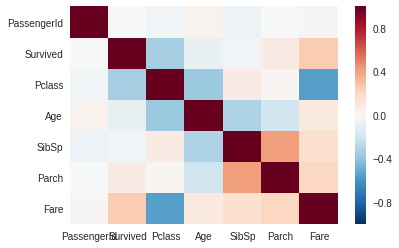

In [9]:
sns.heatmap(train_data.corr())

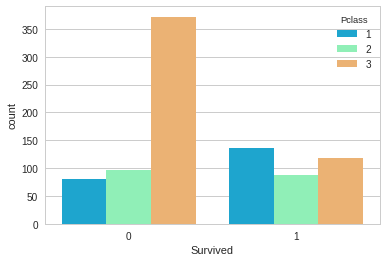

In [10]:
sns.countplot(x='Survived', hue='Pclass', data=train_data, palette='rainbow')

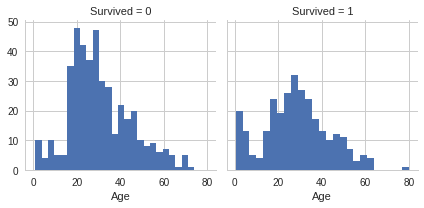

In [43]:
g = sns.FacetGrid(train_data,col='Survived')
g.map(plt.hist, 'Age',bins=25)

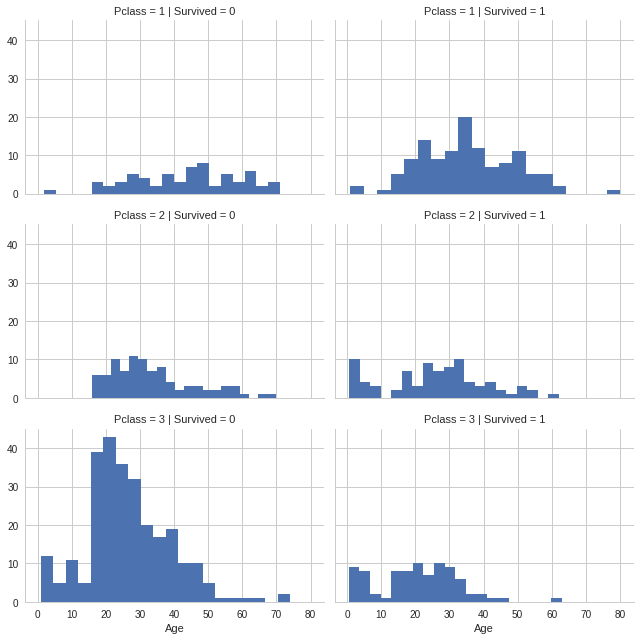

In [11]:
g = sns.FacetGrid(train_data,row='Pclass',col='Survived', aspect=1.5)
g.map(plt.hist, 'Age',bins=20)

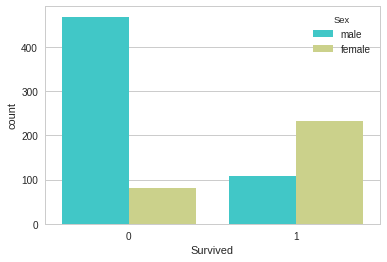

In [30]:
sns.countplot(x='Survived', hue='Sex', data=train_data, palette='rainbow')

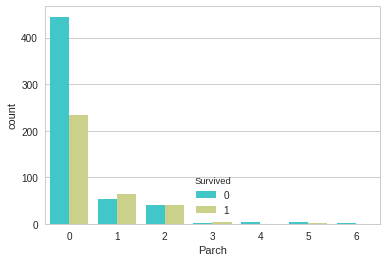

In [28]:
sns.countplot(x='Parch', hue='Survived', data=train_data, palette='rainbow')

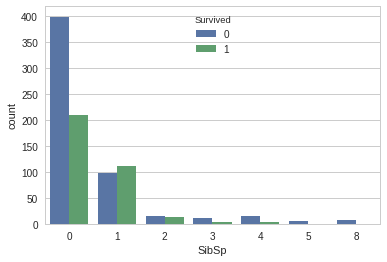

In [49]:
sns.countplot(x='SibSp', hue='Survived', data=train_data)

### Complete Missing Data 
Using heatmap we can visualise where and how much data is missing in our dataset. 

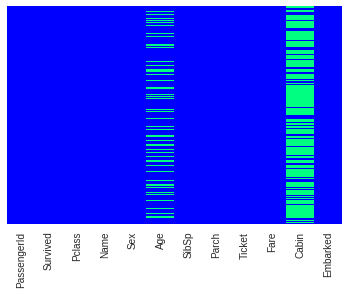

In [12]:
sns.heatmap(train_data.isnull(),yticklabels=False,cbar=False,cmap='winter')

#### Observations:
    - Mean Age of Pclass can be used to fill missing age data.

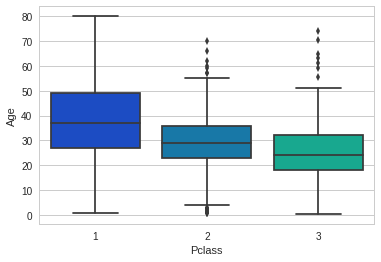

In [13]:
sns.boxplot(x='Pclass',y='Age',data=train_data, palette='winter')

Impute Age Feature:

In [14]:
train_data.groupby(by='Pclass')['Age'].mean()

Pclass
1    38.233441
2    29.877630
3    25.140620
Name: Age, dtype: float64

In [15]:
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):
        if Pclass == 1:
            return 38
        elif Pclass == 2:
            return 29
        else:
            return 25
    else:
        return Age

In [16]:
train_data['Age'] = train_data[['Age','Pclass']].apply(impute_age,axis=1)

Impute Embarked Feature:

In [45]:
embarked_mode = train_data['Embarked'].dropna().mode()[0]
train_data['Embarked'] = train_data['Embarked'].fillna(embarked_mode)

In [46]:
# to-do (R2): 'Cabin' column transformation


### Feature Extraction


Feature: Title

In [18]:
#train_data['Title'] = train_data['Name'].apply(lambda x: x.split(",")[1].split(' ')[1])
train_data['Title'] = train_data.Name.str.extract(' ([A-Za-z]+)\.', expand=False)

In [19]:
pd.crosstab(train_data['Title'],train_data['Sex'])

Sex,female,male
Title,,
Capt,0,1
Col,0,2
Countess,1,0
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40


In [20]:
train_data['Title'] = train_data['Title'].replace(['Lady', 'Countess','Capt', 'Col','Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
train_data['Title'] = train_data['Title'].replace(['Mlle','Ms'], 'Miss')
train_data['Title'] = train_data['Title'].replace('Mme', 'Mrs')

train_data['Title'] = train_data['Title'].map({"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5})

In [21]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,3
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,3
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1


### Correction
Drop PassengerId, Name, Ticket, Cabin Features

In [22]:
train_data.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1, inplace=True)

### Variable Transformation

Modify Sex and Embark features into numerical values to input in model

In [57]:
train_data['Sex'] = train_data['Sex'].map({'female':1, 'male':0})
train_data['Embarked'] = train_data['Embarked'].map({'S':0, 'C':1, 'Q':2})
train_data['Fare'] = train_data['Fare'].apply(lambda x: np.round(x,2))

In [58]:
train_data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,NaN,22.0,1,0,7.25,NaN,1
1,1,1,NaN,38.0,1,0,71.28,NaN,3
2,1,3,NaN,26.0,0,0,7.92,NaN,2
3,1,1,NaN,35.0,1,0,53.10,NaN,3
4,0,3,NaN,35.0,0,0,8.05,NaN,1


## Building a Logistic Model

### Train Test Split

In [26]:
from sklearn.model_selection import train_test_split

In [48]:
X = train_data[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked', 'Title']]
Y = train_data[['Survived']]

In [49]:
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.3, random_state=101)

### Training and Prediction

In [50]:
from sklearn.linear_model import LogisticRegression

logModel2 = LogisticRegression()

In [51]:
logModel2.fit(X_train, y_train)

/home/deeplearning/anaconda2/lib/python2.7/site-packages/sklearn/utils/validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [52]:
predictions = logModel2.predict(X_test)

### Evaluation

In [53]:
from sklearn.metrics import classification_report

### Result 1:
Features: Pclass, 	Sex, 	Age, 	SibSp, 	Parch, 	Fare, 	Embarked, 	Title

Model: LogisticRegression

In [54]:
train_data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,0,22.0,1,0,7.2500,0.0,1
1,1,1,1,38.0,1,0,71.2833,1.0,3
2,1,3,1,26.0,0,0,7.9250,0.0,2
3,1,1,1,35.0,1,0,53.1000,0.0,3
4,0,3,0,35.0,0,0,8.0500,0.0,1


In [55]:
acc_log = round(logModel2.score(X_train, y_train) * 100, 2)
acc_log

82.83

In [32]:
print(classification_report(y_test,predictions))

             precision    recall  f1-score   support

          0       0.77      0.88      0.82       154
          1       0.79      0.64      0.71       114

avg / total       0.78      0.78      0.77       268

